In [49]:
import sys
import os
import math
import matplotlib.pyplot as plt
import numpy as np

PROJECT_ROOT = os.path.abspath(os.pardir)
sys.path.append(PROJECT_ROOT)

%matplotlib widget

In [50]:
bigLUT = np.load('data/ownlut.npy')
d = np.load('data/ownlutAxes.npz')
energies = d['arr_0']
stepsizeArray = d['arr_1']
densityArray = d['arr_2']

Text(0, 0.5, '$E[\\cos(\\theta)]$')

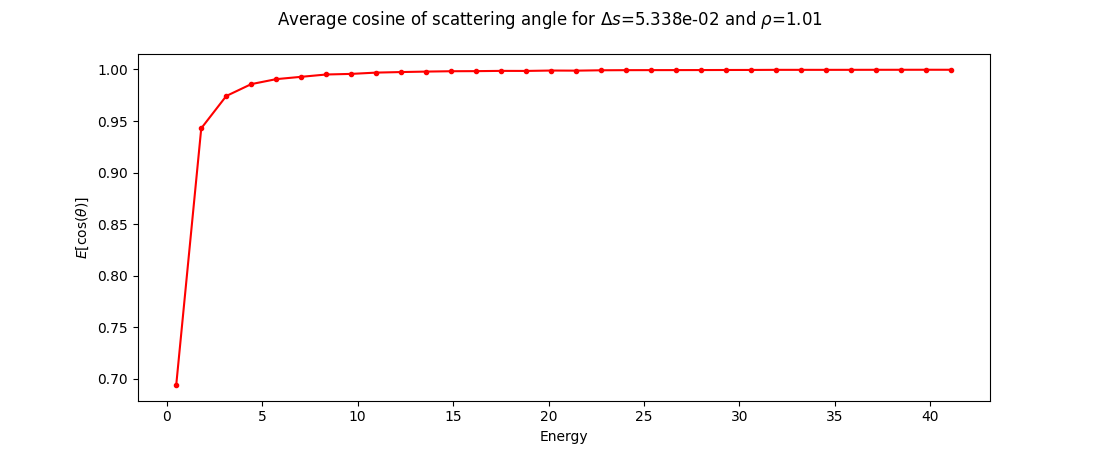

In [51]:
# Plot cos(theta)
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

# Data
fig, ax1 = plt.subplots(figsize=(11, 4.5))
fig.suptitle(f'Average cosine of scattering angle for $\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 0], '.-r', label=f'$\cos(\\theta)$')
ax1.set_xlabel('Energy')
ax1.set_ylabel('$E[\cos(\\theta)]$')

[18394.43878594 11701.55048709 10859.15069247 10578.07451197
 10449.27667294 10379.39234332 10337.19267944 10309.74280628
 10290.87925534 10277.35606411 10267.329769   10259.68963824
 10253.73373704 10249.00067802 10245.17700583 10242.04368959
 10239.44391843 10237.26302569 10235.41558671 10233.83690228
 10232.47724252 10231.29787374 10230.26826372 10229.36408211
 10228.56574751 10227.85735676 10227.22588573 10226.66058567
 10226.1525222  10225.69421978 10225.27938485 10224.90268845]
[0.69436222 0.94293325 0.97424586 0.98578064 0.99060801 0.99286726
 0.99510759 0.99569541 0.99694299 0.99748113 0.99792881 0.99827682
 0.99836116 0.99861248 0.9985677  0.99894784 0.99883582 0.99919873
 0.99931228 0.99935291 0.99937674 0.99941536 0.9994776  0.99951803
 0.99962377 0.99962258 0.99961593 0.99963778 0.99966544 0.99968458
 0.99970969 0.9996959 ]


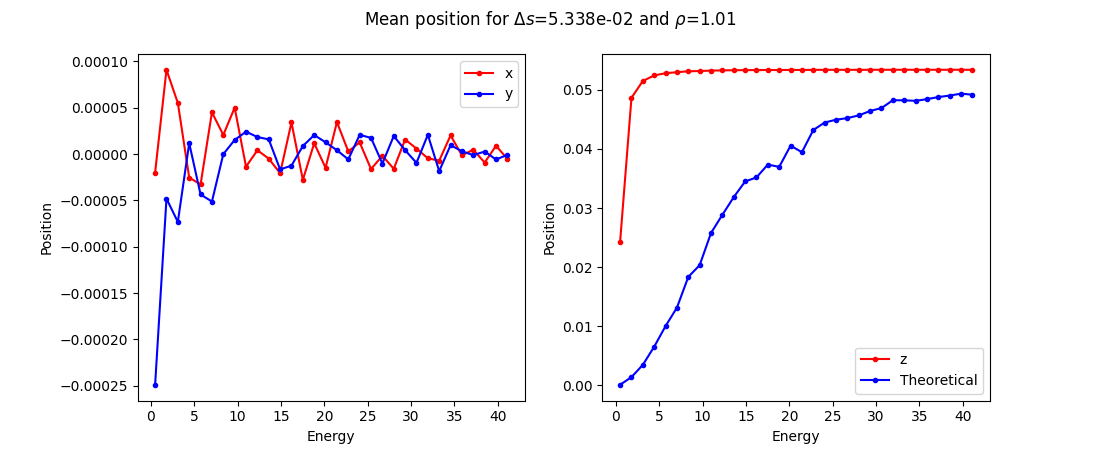

In [52]:
from electronTransportCode.Material import Material
from electronTransportCode.ParticleModel import SimplifiedEGSnrcElectron

# Average x, y and z position
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

# Theoretical average step
particle = SimplifiedEGSnrcElectron()
EcostArray = bigLUT[:, stepsizeIndex, densityIndex, 0]
stepsize = stepsizeArray[stepsizeIndex]
material = Material(rho=densityArray[densityIndex])
halfEnergy = np.array([energy-particle.energyLoss(energy, None, stepsize, material)/2 for energy in energies], dtype=float)
stepsizeDsArray = stepsize*np.array([particle.getScatteringRate(None, energy, material) for energy in halfEnergy], dtype=float)
expSum: float = 1.0 - np.exp(stepsizeDsArray*(EcostArray - 1.0))
A_coef = EcostArray*stepsize*expSum/((1 - EcostArray)*stepsizeDsArray)

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Mean position for $\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 1], '.-r', label=f'x')
ax1.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 2], '.-b', label=f'y')
ax1.set_xlabel('Energy')
ax1.set_ylabel('Position')
ax1.legend()

ax2.plot(energies, bigLUT[:, stepsizeIndex, densityIndex, 3], '.-r', label=f'z')
ax2.plot(energies, A_coef, '.-b', label=f'Theoretical')
ax2.set_xlabel('Energy')
ax2.set_ylabel('Position')
ax2.legend()
print(np.array([particle.getScatteringRate(None, energy, material) for energy in energies], dtype=float))
print(bigLUT[:, stepsizeIndex, densityIndex, 0])

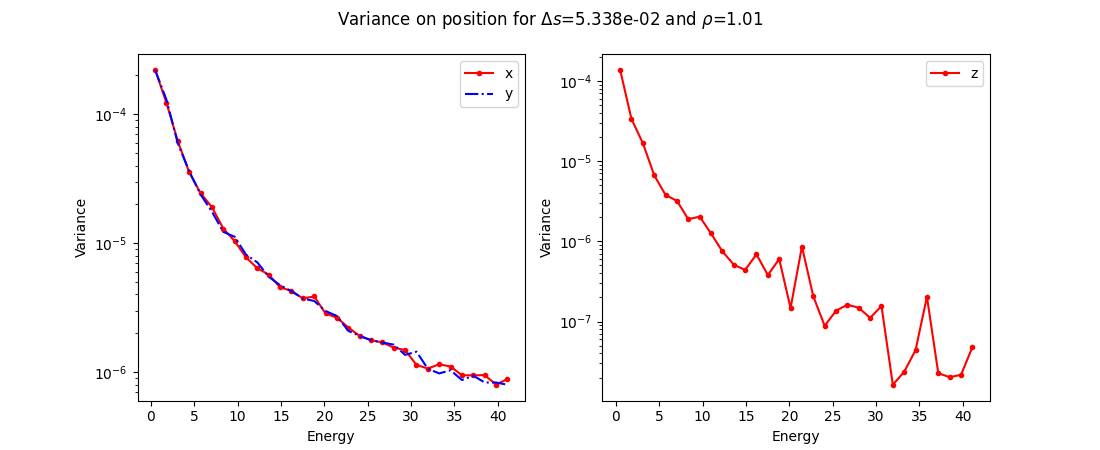

In [53]:
# Average x, y and z position
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Variance on position for $\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.semilogy(energies, bigLUT[:, stepsizeIndex, densityIndex, 4], '.-r', label=f'x')
ax1.semilogy(energies, bigLUT[:, stepsizeIndex, densityIndex, 5], '-.b', label=f'y')
ax1.set_xlabel('Energy')
ax1.set_ylabel('Variance')
ax1.legend()

ax2.semilogy(energies, bigLUT[:, stepsizeIndex, densityIndex, 6], '.-r', label=f'z')
ax2.set_xlabel('Energy')
ax2.set_ylabel('Variance')
ax2.legend()

# Little noise on variance

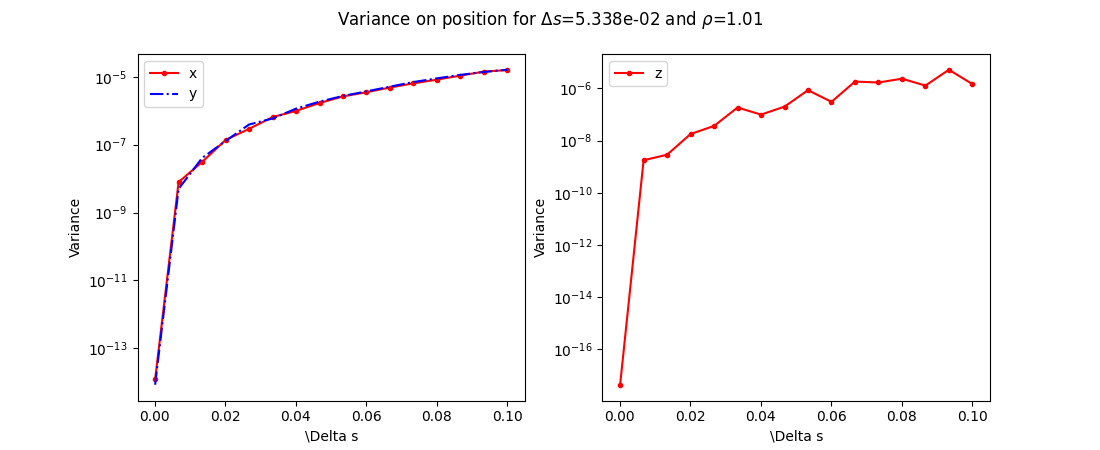

In [54]:
# Average x, y and z position
energyIndex = energies.size//2
densityIndex = densityArray.size//2

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Variance on position for $\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 4], '.-r', label=f'x')
ax1.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 5], '-.b', label=f'y')
ax1.set_xlabel('\Delta s')
ax1.set_ylabel('Variance')
ax1.legend()

ax2.semilogy(stepsizeArray, bigLUT[energyIndex, :, densityIndex, 6], '.-r', label=f'z')
ax2.set_xlabel('\Delta s')
ax2.set_ylabel('Variance')
ax2.legend()

) missing from current font.st-packages/ipympl/backend_nbagg.py:336: UserWarning: Glyph 13 (
  self.figure.savefig(buf, format='png', dpi='figure')


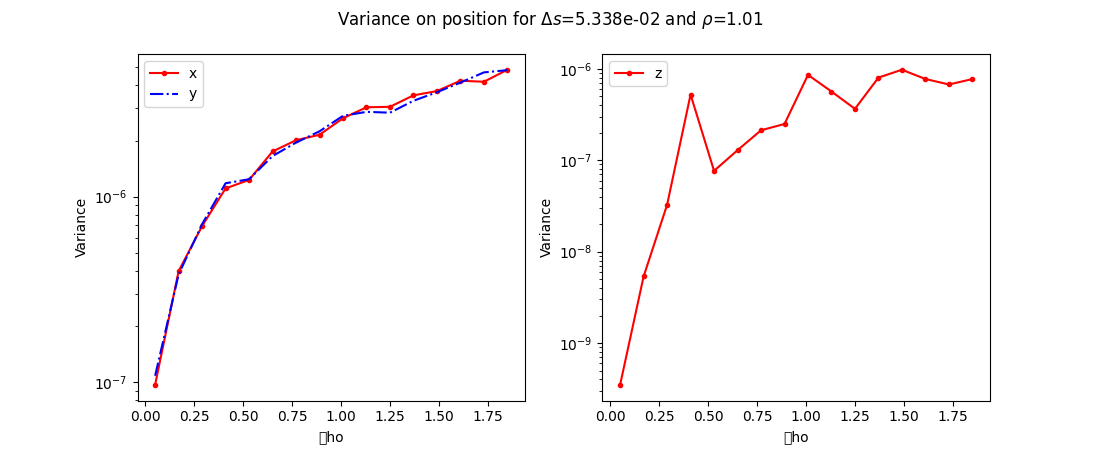

In [55]:
# Average x, y and z position
energyIndex = energies.size//2
stepsizeIndex = stepsizeArray.size//2

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))
fig.suptitle(f'Variance on position for $\Delta s$={stepsizeArray[stepsizeIndex]:.3e} and $\\rho$={densityArray[densityIndex]}')

ax1.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 4], '.-r', label=f'x')
ax1.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 5], '-.b', label=f'y')
ax1.set_xlabel('\rho')
ax1.set_ylabel('Variance')
ax1.legend()

ax2.semilogy(densityArray, bigLUT[energyIndex, stepsizeIndex, :, 6], '.-r', label=f'z')
ax2.set_xlabel('\rho')
ax2.set_ylabel('Variance')
ax2.legend()